## Look at Drake Passage transport over time

In [1]:
import xarray as xr
import numpy as np
import gsw
import cmocean
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('/home/users/birgal/')

In [2]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
nemo_mesh= f'{base_dir}bathymetry/mesh_mask-20240305.nc'

In [3]:
ts_sose_spin = xr.open_dataset(f'{base_dir}output/ERA5_test6/timeseries-drake-spinup.nc')
ts_woa_spin  = xr.open_dataset(f'{base_dir}output/ERA5_test7/timeseries-drake-spinup.nc')
ts_sose      = xr.open_dataset(f'{base_dir}output/ERA5_test6/timeseries-drake.nc')
ts_woa       = xr.open_dataset(f'{base_dir}output/ERA5_test7/timeseries-drake.nc')

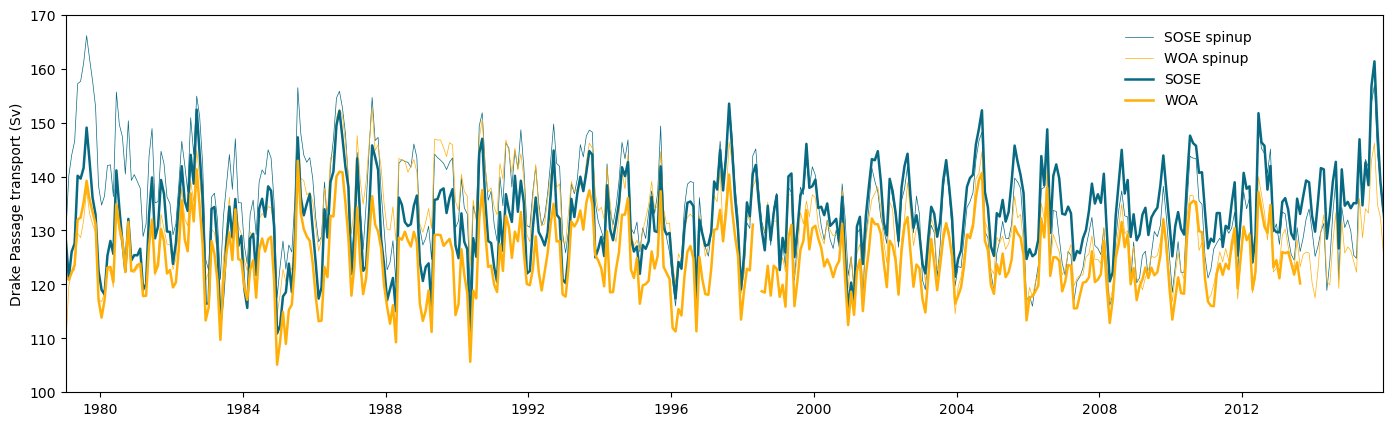

In [4]:
fig, ax = plt.subplots(1,1, figsize=(17,5), dpi=100)
ax.plot(ts_sose_spin.time_centered, ts_sose_spin.drake_passage_transport, label='SOSE spinup', linewidth=0.5, c='#076a82')
ax.plot(ts_woa_spin.time_centered , ts_woa_spin.drake_passage_transport,  label='WOA spinup', linewidth=0.5, c='#ffaf07')
ax.plot(ts_sose.time_centered, ts_sose.drake_passage_transport.where(ts_sose.drake_passage_transport!=0), 
        label='SOSE', linewidth=1.8, c='#076a82')
ax.plot(ts_woa.time_centered , ts_woa.drake_passage_transport.where(ts_woa.drake_passage_transport!=0), 
        label='WOA', linewidth=1.8, c='#ffaf07')
ax.set_ylabel('Drake Passage transport (Sv)')
ax.set_xlim(ts_woa_spin.time_centered[0],ts_woa_spin.time_centered[-1])
ax.set_ylim(100, 170)
ax.legend(loc=(0.8, 0.74), frameon=False)

### And Weddell Gyre transport

In [9]:
spinup = xr.open_dataset(f'{base_dir}output/ERA5_test9/timeseries-weddell-spinup.nc')
# round2 = xr.open_dataset(f'{base_dir}output/ERA5_test6/timeseries-weddell.nc')

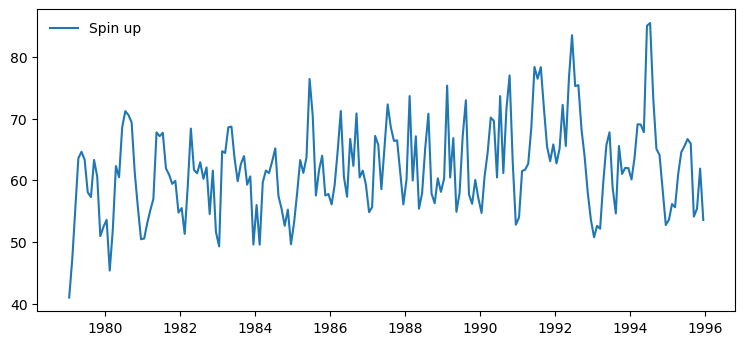

In [10]:
fig, ax = plt.subplots(1,1, figsize=(9,4), dpi=100)
ax.plot(spinup.time_counter, spinup.weddell_gyre_transport.where(spinup.weddell_gyre_transport!=0), label='Spin up')
# ax.plot(round2.time_counter, round2.weddell_gyre_transport.where(round2.weddell_gyre_transport!=0), label='Round 2')
ax.legend(frameon=False)